# Student's Dropout Prediction using Supervised Machine Learning Classifiers

In [20]:
# Importing relevant libraries

# Data wrangling
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns

# Data Visualization
import matplotlib.pyplot as plt


# Data pre-processing
from sklearn.preprocessing import StandardScaler

# Data splitting
from sklearn.model_selection import train_test_split

# Machine learning Models
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


# Evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc


In [8]:
# Read dataset from csv file
data =  pd.read_csv("student's dropout dataset.csv")

# Correcting typographical error for nationality
data.rename(columns = {'Nacionality':'Nationality'}, inplace = True)
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Descriptive analysis

In [9]:
# shape of data
data.shape

(4424, 35)

We have 4,424 observations (rows) and 35 features (Columns)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

The results shows that all columns are numerical except the target column

In [11]:
# descriptive analysis
pd.set_option('display.max_columns', None)
data.describe(include = 'all')

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,7.819168,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,4.856692,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


In [12]:
#Checking for null values
data.isnull().any().sum()

0

No null values present in the data set

#Exploratory Data Analysis

The majority of categorical variables in the downloaded dataset have already been converted to numerical format. However, for the purpose of exploratory data analysis (EDA), we will revert certain columns to their original categorical form.

In [13]:
# Create a copy for exploratory data analysis
data_viz = data.copy()

## Target Feature
First we explore the values in the target column

In [14]:
data['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

From the target column we can infer the following:
* Dropout: The student dropped out
* Graduate: The student graduated
* Enrolled: The student is currently enrolled

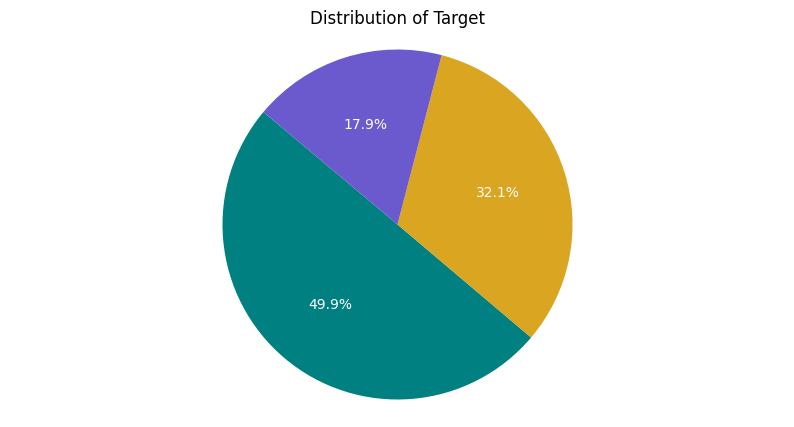

In [17]:
# Data preparation
target_counts = data_viz['Target'].value_counts()
labels = target_counts.index.to_list()
sizes = target_counts.values
colors = ['teal', 'goldenrod', 'slateblue']

# Create pie chart
plt.figure(figsize=(10, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'color':"w"})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Title
plt.title('Distribution of Target')

# Save the figure
plt.savefig('fig.svg', format='svg')

# Show the plot
plt.show()


**Observation**
* The graph shows that majority of the students are Graduates **(49%)**
* There are also more Dropouts **(32.1%)** than those currently Enrolled **(17%)**

## Age distribution of students

**Observation**

* Distribution shows that the data is right skewed indicating that majority of the students are in their late teen's to early 20's
* It is also observed that there was an increase in dropout rate from students in their mid 20's to early 30's

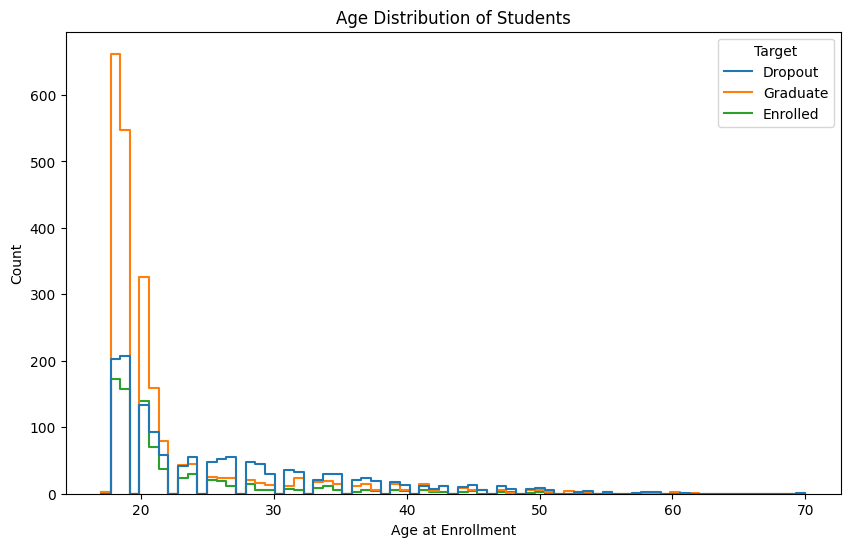

In [23]:
# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create the histogram
sns.histplot(data=data_viz, x='Age at enrollment', hue='Target', element='step', fill=False, palette='tab10', common_norm=False)

# Add titles and labels
plt.title('Age Distribution of Students')
plt.xlabel('Age at Enrollment')
plt.ylabel('Count')

# Save the figure
plt.savefig('fig.svg', format='svg')

# Show the plot
plt.show()

For the next set of data visualizations, we would be dealing with pie charts mostly. To reduce repeatability of code, two functions are created;

One to create dictionaries of all categories with respect to number of students enrolled, students who dropped out or graduated, the other would be to create pie charts based on the dictionaries created for visualization.

In [24]:
def get_dictionaries(category_list, dfcolumn_name, target_col, dictionary_list):
  '''This function returns a list of dictionaries for value count of each target label per category'''
  for each_category in category_list:
    a_dictionary = dict(data_viz[data_viz[dfcolumn_name]== each_category][target_col].value_counts())
    dictionary_list.append(a_dictionary)
  return dictionary_list

In [25]:
def make_pie(dictionary_list, trace_list, colors_list, textposition = 'inside'):
  '''This function returns a list of traces for pie charts'''
  for dictionary in dictionary_list:
    trace = go.Pie(values = list(dictionary.values()), labels = list(dictionary.keys()),
           textposition = textposition, textinfo='percent+label',
           marker=dict(colors=colors_list))
    trace_list.append(trace)
  return trace_list



## Gender distribution of students

In [26]:
# Change gender from numerical to catgorical
data_viz['Gender'] = data_viz['Gender'].map({1:'Male', 0:'Female'})

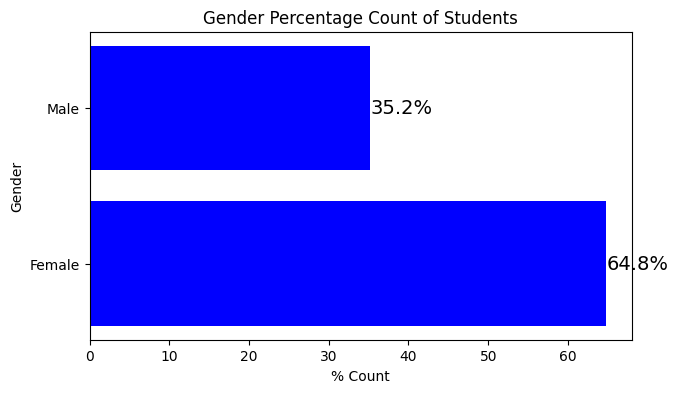

In [32]:
# Calculate percentage count for gender
percent_count = round(data_viz['Gender'].value_counts(normalize=True) * 100, 1)

# Create a horizontal bar plot
plt.figure(figsize=(7, 4))
bars = plt.barh(percent_count.index, percent_count.values, color='blue')

# Add value labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.1f}%', 
             va='center', ha='left', fontsize=14)

# Set titles and labels
plt.title('Gender Percentage Count of Students')
plt.xlabel('% Count')
plt.ylabel('Gender')

# Save the figure
plt.savefig('gender_percentage_bar.svg', format='svg')

# Show the plot
plt.show()


In [29]:
# Getting dictionaries for genders
genders = data_viz['Gender'].unique()
genders_dictionaries = get_dictionaries(genders, 'Gender', 'Target', [])
genders_dictionaries

[{'Dropout': 701, 'Graduate': 548, 'Enrolled': 307},
 {'Graduate': 1661, 'Dropout': 720, 'Enrolled': 487}]

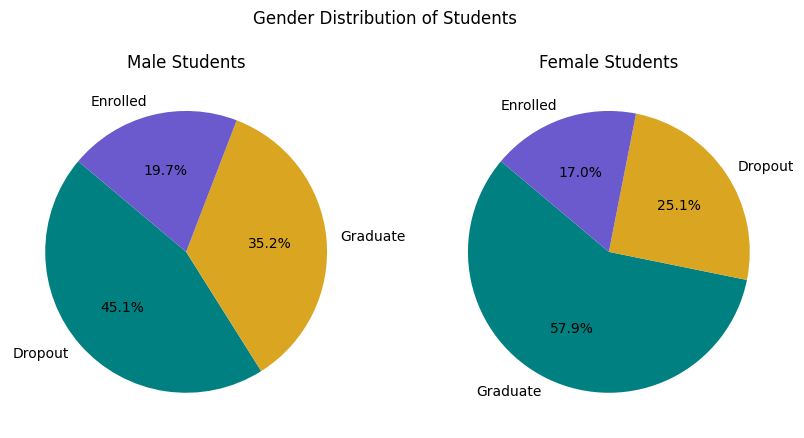

In [31]:
# Assuming genders_dictionaries contains two dictionaries for male and female students
male_data = genders_dictionaries[0]
female_data = genders_dictionaries[1]

# Colors for the pie charts
colors = ['teal', 'goldenrod', 'slateblue']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Pie chart for Male Students
axes[0].pie(male_data.values(), labels=male_data.keys(), colors=colors, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Male Students')

# Pie chart for Female Students
axes[1].pie(female_data.values(), labels=female_data.keys(), colors=colors, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Female Students')

# Overall Title
plt.suptitle('Gender Distribution of Students')

# Save the figure
plt.savefig('gender_distribution_pies.svg', format='svg')

# Show the plot
plt.show()


**Observation**
* There was a significant number of female students (64.8%) compared to the males (35.2%).
* Also it is observed that there was a higher rate of dropout students that were male (45.1%), compared to the females (25.1%).

## Students courses

In [33]:
# Converting the courses back to categorical
data_viz['Course'] = data_viz['Course'].map({1: 'Biofuel Production Technologies',
 2: 'Animation and Multimedia Design', 3: 'Social Service (evening attendance)',
 4: 'Agronomy', 5: 'Communication Design', 6: 'Veterinary Nursing',
 7: 'Informatics Engineering', 8: 'Equiniculture', 9: 'Management',
 10: 'Social Service', 11: 'Tourism', 12: 'Nursing', 13: 'Oral Hygiene',
 14: 'Advertising and Marketing Management', 15: 'Journalism and Communication',
 16: 'Basic Education', 17: 'Management (evening attendance)'})

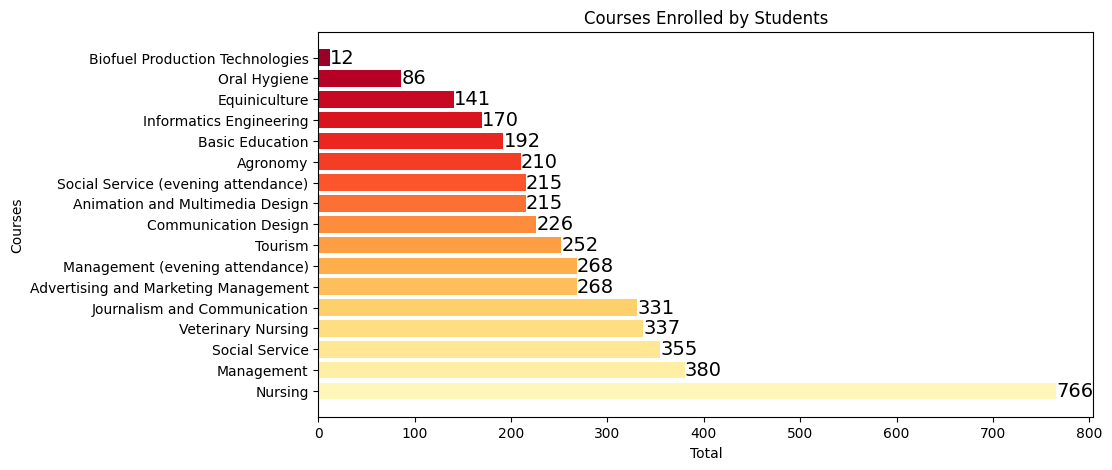

In [34]:
# Calculate count for courses
course_count = data_viz['Course'].value_counts()

# Set the color palette
colors = sns.color_palette("YlOrRd", len(course_count))

# Create a horizontal bar plot
plt.figure(figsize=(10, 5))
bars = plt.barh(course_count.index, course_count.values, color=colors)

# Add value labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{int(bar.get_width())}', 
             va='center', ha='left', fontsize=14)

# Set titles and labels
plt.title('Courses Enrolled by Students')
plt.xlabel('Total')
plt.ylabel('Courses')

# Save the figure
plt.savefig('course_enrollment_bar.svg', format='svg')

# Show the plot
plt.show()


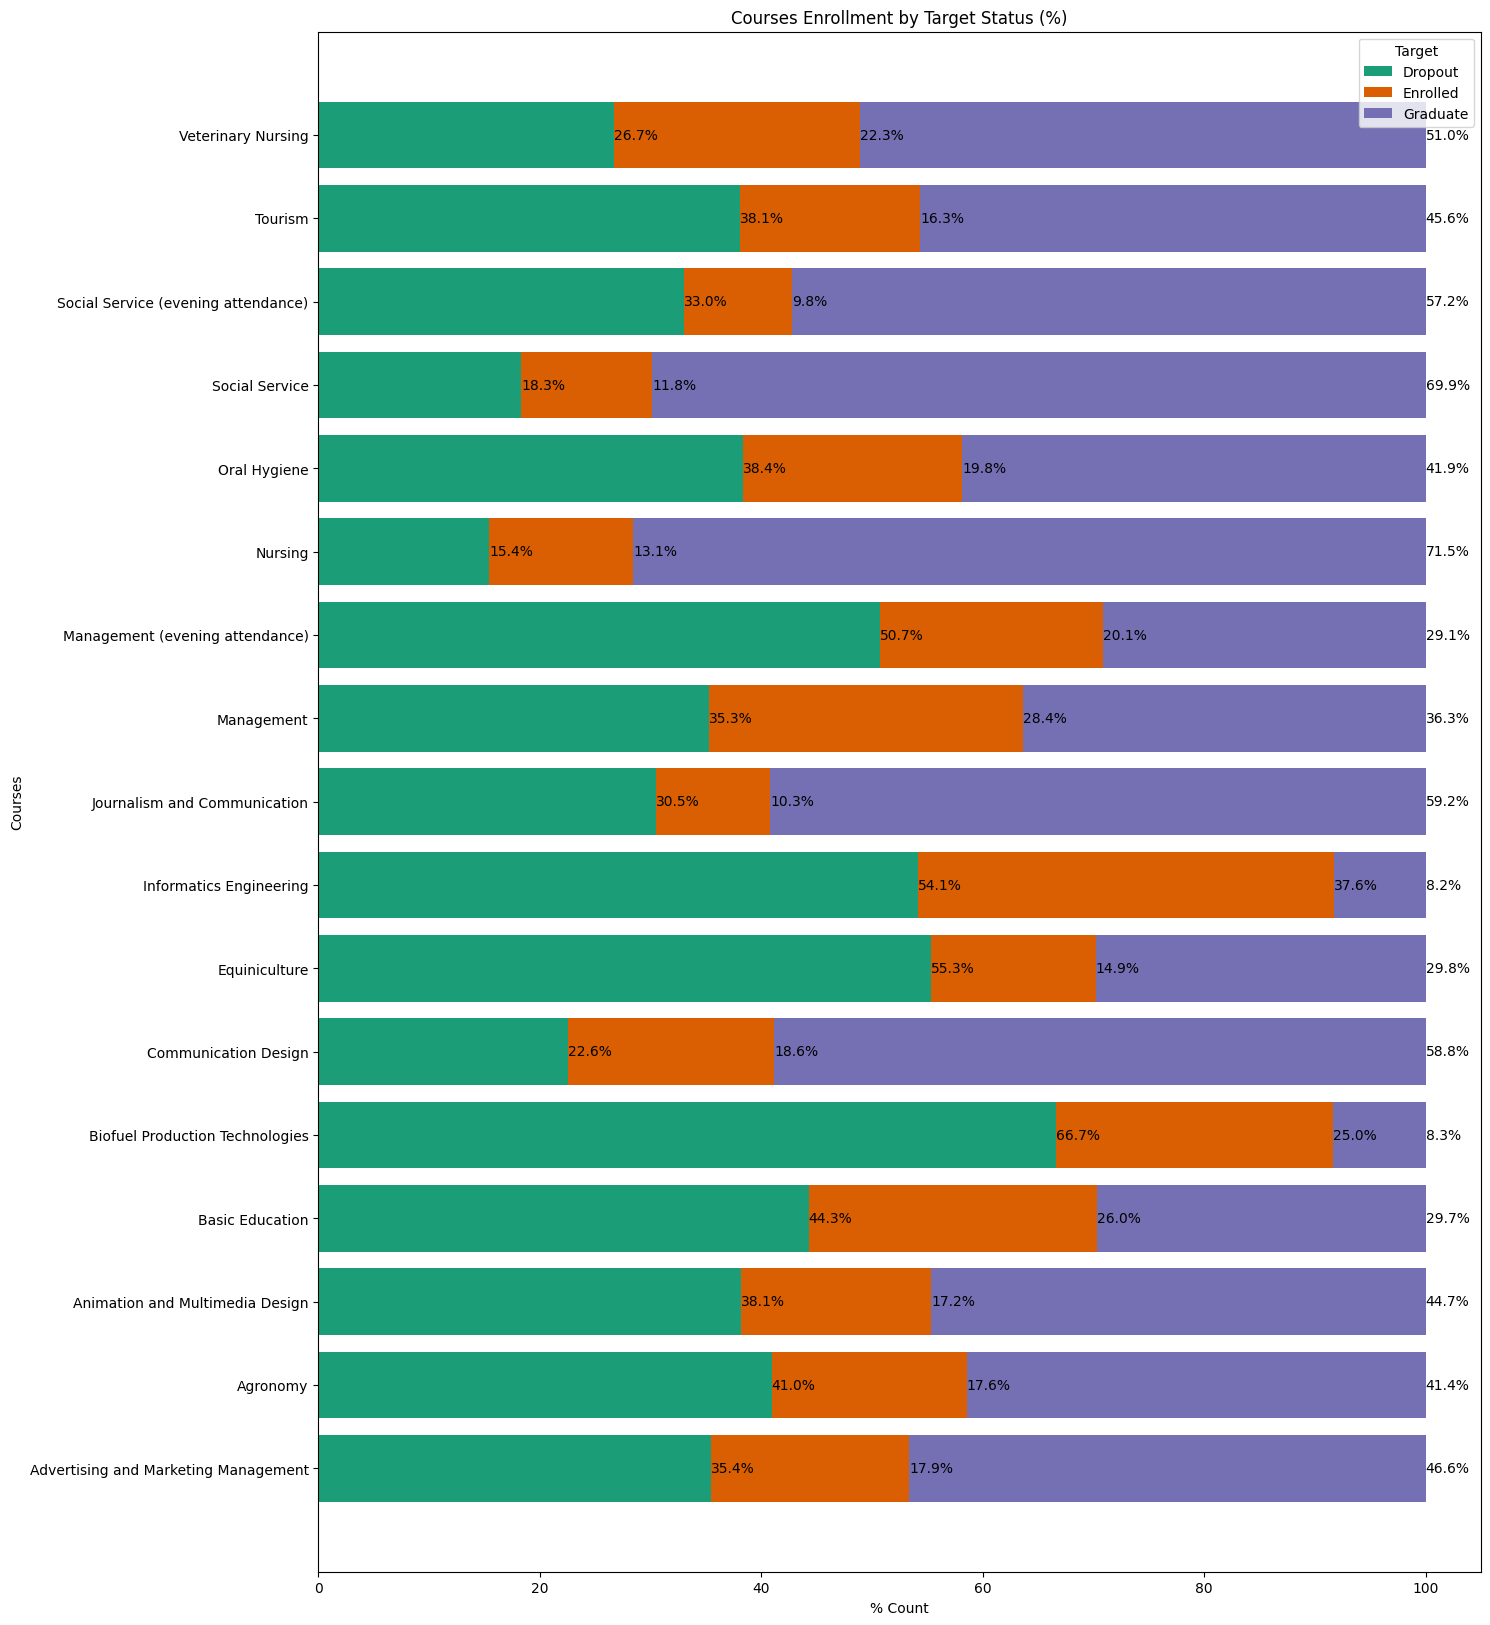

In [36]:
# Set the color palette
colors = sns.color_palette("Dark2", n_colors=data_viz['Target'].nunique())

# Prepare data for grouped bar chart
grouped = data_viz.groupby(['Course', 'Target']).size().unstack(fill_value=0)
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100  # Convert counts to percentage

# Plot
fig, ax = plt.subplots(figsize=(15, 20))

# Iterate over each target status and plot
for i, target_status in enumerate(grouped_percent.columns):
    ax.barh(grouped_percent.index, grouped_percent[target_status], 
            left=grouped_percent.iloc[:, :i].sum(axis=1) if i > 0 else 0, 
            color=colors[i], label=target_status)

# Adding text labels for percentages
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + p.get_x(), p.get_y() + p.get_height() / 2,
                f'{width:.1f}%', ha='left', va='center')

# Set titles and labels
ax.set_title('Courses Enrollment by Target Status (%)')
ax.set_xlabel('% Count')
ax.set_ylabel('Courses')

# Legend
ax.legend(title='Target')

# Save the figure
plt.savefig('courses_by_target.svg', format='svg')

# Show the plot
plt.show()

**Observation**

Majority of the students are enrolled in Nursing and it also had the lowest droput rate of about **15.4%**.

The course that had the highest dropout rate was **Biofuel Production Technologies (66.7%)** which is also had the least number of enrolled students followed by **Equiniculture (55.3%)**.


## Martial status


In [37]:
# Converting back to categorical
data_viz['Marital status'] = data_viz['Marital status'].map({1:'Single', 2: 'Married',
                                                             3: 'Widower', 4: 'Divorced',
                                                             5: 'Facto union', 6: 'Legally Separated'})

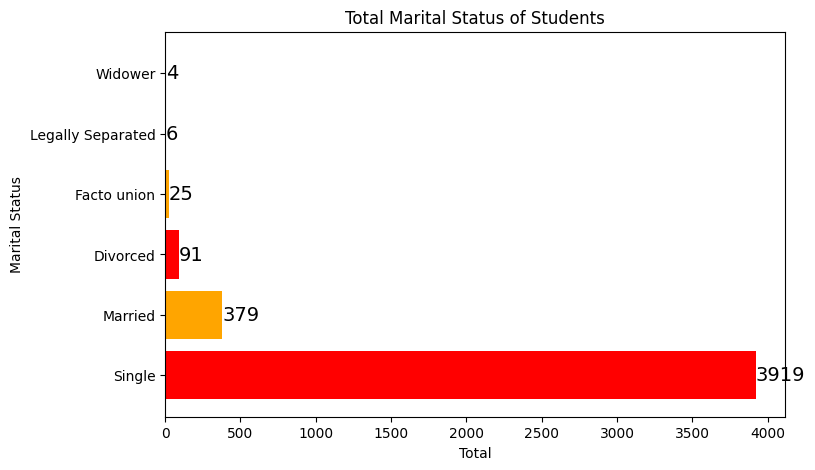

In [39]:
# Get counts for marital status
marital_status_counts = data_viz['Marital status'].value_counts()

# Create a horizontal bar plot
plt.figure(figsize=(8, 5))
bars = plt.barh(marital_status_counts.index, marital_status_counts.values, color=['red', 'orange'])

# Add value labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{int(bar.get_width())}', 
             va='center', ha='left', fontsize=14)

# Set titles and labels
plt.title('Total Marital Status of Students')
plt.xlabel('Total')
plt.ylabel('Marital Status')

# Save the figure
plt.savefig('marital_status_bar.svg', format='svg')

# Show the plot
plt.show()


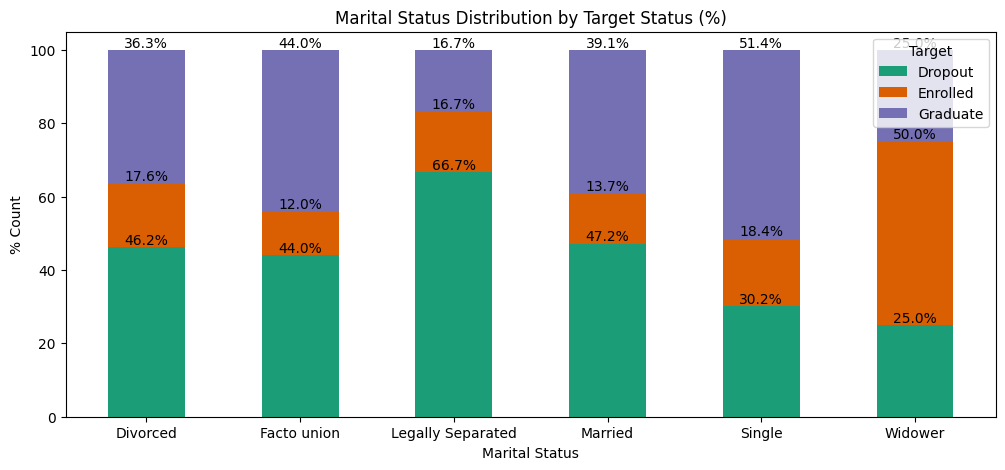

In [40]:
# Set the color palette
colors = sns.color_palette("Dark2", n_colors=data_viz['Target'].nunique())

# Prepare data for grouped bar chart
grouped = data_viz.groupby(['Marital status', 'Target']).size().unstack(fill_value=0)
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100  # Convert counts to percentage

# Plot
fig, ax = plt.subplots(figsize=(12, 5))

# Iterate over each target status and plot
for i, target_status in enumerate(grouped_percent.columns):
    ax.bar(grouped_percent.index, grouped_percent[target_status], 
           bottom=grouped_percent.iloc[:, :i].sum(axis=1) if i > 0 else 0, 
           color=colors[i], label=target_status, width=0.5)

# Adding text labels for percentages
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2, height + p.get_y(),
                f'{height:.1f}%', ha='center', va='bottom')

# Set titles and labels
ax.set_title('Marital Status Distribution by Target Status (%)')
ax.set_xlabel('Marital Status')
ax.set_ylabel('% Count')

# Legend
ax.legend(title='Target')

# Save the figure
plt.savefig('marital_status_by_target.svg', format='svg')

# Show the plot
plt.show()

**Observation**

* Vast majority of the students are single, however **30.2% of single students** droppout.
* Another thing to note is that **legally seperated students (66.7)** had the highest percentage of dropouts followed by **Married students (47.2%)**.

For function below is created to simplify the process and reduce repeatability.

In [41]:
def sub_plots(chart_to_plot, row, col):
  '''This function generates the list of subplots'''
  cols = chart_to_plot * col
  rows = [cols] * row
  return rows


## Student's Financial Status

Next, we will analyze the financial status of students to understand how scholarship status, debt status, and tuition payment status correlate with dropout rates.



In [42]:
# Converting columns back to categorical
to_convert = ['Debtor', 'Tuition fees up to date', 'Scholarship holder']
for i in to_convert:
    data_viz[i] = data_viz[i].map({1:'Yes', 0: 'No'})

In [43]:
# Getting dictionaries for students in debt/ not in debt
debt = data_viz['Debtor'].unique()
debt_dictionaries = get_dictionaries(debt, 'Debtor', 'Target', [])
debt_dictionaries

[{'Graduate': 2108, 'Dropout': 1109, 'Enrolled': 704},
 {'Dropout': 312, 'Graduate': 101, 'Enrolled': 90}]

In [44]:
# Getting dictionaries for students with tuition fees paid/ not paid
tuition = data_viz['Tuition fees up to date'].unique()
tuition_dictionaries = get_dictionaries(tuition, 'Tuition fees up to date', 'Target', [])
tuition_dictionaries

[{'Graduate': 2180, 'Dropout': 964, 'Enrolled': 752},
 {'Dropout': 457, 'Enrolled': 42, 'Graduate': 29}]

In [45]:
# Getting dictionaries for students with scholarship/ no scholarship
scholarship = data_viz['Scholarship holder'].unique()
scholarship_dictionaries = get_dictionaries(scholarship, 'Scholarship holder', 'Target', [])
scholarship_dictionaries

[{'Graduate': 1374, 'Dropout': 1287, 'Enrolled': 664},
 {'Graduate': 835, 'Dropout': 134, 'Enrolled': 130}]

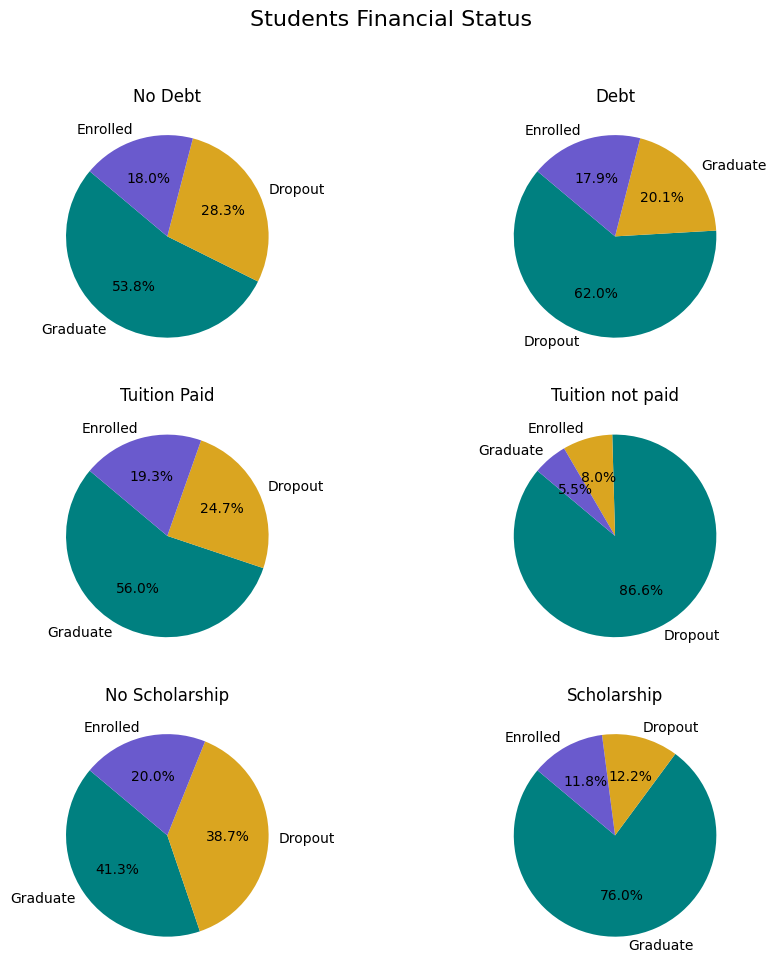

In [48]:
# Define the figure and subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
colors = ['teal', 'goldenrod', 'slateblue']

# Assuming the dictionaries contain the necessary data for each pie chart
# The make_pie function would be responsible for preparing the data, which you might need to adjust

# For simplicity, I'll demonstrate with placeholder data
# Replace these with your actual data
debt_data = debt_dictionaries
tuition_data = tuition_dictionaries
scholarship_data = scholarship_dictionaries

# Titles for each subplot
subplot_titles = ['No Debt', 'Debt', 'Tuition Paid', 'Tuition not paid', 'No Scholarship', 'Scholarship']

# Plotting each pie chart
for i, ax in enumerate(axes.flatten()):
    if i < 2:
        data = debt_data[i]
    elif 2 <= i < 4:
        data = tuition_data[i - 2]
    else:
        data = scholarship_data[i - 4]

    ax.pie(data.values(), labels=data.keys(), colors=colors, autopct='%1.1f%%', startangle=140)
    ax.set_title(subplot_titles[i])

# Adjust layout
plt.tight_layout(pad=2.0)

# Overall Title
fig.suptitle('Students Financial Status', fontsize=16)
fig.subplots_adjust(top=0.88)  # Adjust the top so the title has space

# Save the figure
plt.savefig('financial_status_pies.svg', format='svg')

# Show the plot
plt.show()


**Observation**

Unsurprisingly, students who were in **debt** and had not completed payment for **tuition** had a higher dropout rate of **62% and 86.6%** respectively.

Similarly, students who were granted **scholarships** had a low dropout rate of **12.2%** compared to those who were not given **(38.7%)**.

Based on our EDA, we have a good understanding of how the data is distributed by gender and age, as well as how certain features like courses enrolled and financial status correlate with the dropout rate. In the next phase, we will build and train a classification model to see if our findings are consistent with the model's results.

### Data Processing
 Before standardizing the data we need transform the target feature from categorical to numerical data.

In [63]:
# Get dummies for Target columns
dummies = pd.get_dummies(data_viz['Target'])

#Drop all columns except that for Dropout
dummies.drop(['Enrolled',	'Graduate'], axis = 1, inplace= True)
data_viz['Target'] = dummies
data_viz.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,Single,8,5,Animation and Multimedia Design,1,1,1,13,10,6,10,1,0,No,Yes,Male,No,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,True
1,Single,6,1,Tourism,1,1,1,1,3,4,4,1,0,No,No,Male,No,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,False
2,Single,1,5,Communication Design,1,1,1,22,27,10,10,1,0,No,No,Male,No,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,True
3,Single,8,2,Journalism and Communication,1,1,1,23,27,6,4,1,0,No,Yes,Female,No,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,False
4,Married,12,1,Social Service (evening attendance),0,1,1,22,28,10,10,0,0,No,Yes,Female,No,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,False


In [64]:
# Assigning x and y features
y = np.array(data_viz['Target'])
X_features = data_viz.drop('Target', axis = 1)
X_features.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,Single,8,5,Animation and Multimedia Design,1,1,1,13,10,6,10,1,0,No,Yes,Male,No,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,Single,6,1,Tourism,1,1,1,1,3,4,4,1,0,No,No,Male,No,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,Single,1,5,Communication Design,1,1,1,22,27,10,10,1,0,No,No,Male,No,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,Single,8,2,Journalism and Communication,1,1,1,23,27,6,4,1,0,No,Yes,Female,No,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,Married,12,1,Social Service (evening attendance),0,1,1,22,28,10,10,0,0,No,Yes,Female,No,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [65]:
y[:5]

array([ True, False,  True, False, False])

In [67]:
# Assuming X_features is a DataFrame
# One-hot encode the categorical variables
X_features_encoded = pd.get_dummies(X_features)

# Initialize and apply the StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_features_encoded)

print(X)

[[ 0.21006857  2.49089589  0.35008246 ...  1.35764048  0.57491418
  -0.57491418]
 [-0.16740639 -0.55406775  0.35008246 ...  1.35764048  0.57491418
  -0.57491418]
 [-1.11109377  2.49089589  0.35008246 ...  1.35764048  0.57491418
  -0.57491418]
 ...
 [-1.11109377 -0.55406775  0.35008246 ... -0.73657203 -1.73939004
   1.73939004]
 [-1.11109377 -0.55406775  0.35008246 ... -0.73657203 -1.73939004
   1.73939004]
 [-0.35614386 -0.55406775  0.35008246 ... -0.73657203  0.57491418
  -0.57491418]]


## Model Building

Because the target variable is categorical (either Dropout or not), this is a classification problem.
We will train five supervised machine learning classification models:

* Logistic regression
* Decision trees
* Support vector machines
* Random forest
* K-nearest neighbors

First, we will split our data into training, validation, and test sets. We will set the random state to 42 to ensure reproducibility.

### Splitting Training and Test set

In [68]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Creating validation set

In [69]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Baseline Model Accuracy

In [70]:
# Calculate the baseline accuracy to beat
target_value, frequency = np.unique(y, return_counts = True)
print("Unique Values:", target_value)

print("Frequency Values:", frequency)

# Maximum frequency value
max_val = frequency.max()
length_y = len(y)

print('\n')

baseline_acc = round((max_val/length_y) * 100, 3)
print(f'The baseline accuracy to beat is {baseline_acc}%')



Unique Values: [False  True]
Frequency Values: [3003 1421]


The baseline accuracy to beat is 67.88%


A list is created to store all the trained models with the best hyperparameters

In [87]:
# List of all trained models
trained_models = []


### Logistic Regression

In [73]:
# Train a logistic regression model
lr_model = LogisticRegression(random_state = 42, max_iter= 1000)
lr_model.fit(X_train, y_train)


# Predict target values for train data
y_pred_train = lr_model.predict(X_train)

# Predict target values for validation data
y_pred_val = lr_model.predict(X_val)

# Predict target values for test data
y_pred = lr_model.predict(X_test)

# Evaluate the model's accuracy
lr_acc_train = round(accuracy_score(y_train, y_pred_train), 3)
lr_acc_val = round(accuracy_score(y_val, y_pred_val), 3)
lr_acc = round(accuracy_score(y_test, y_pred), 2)
print(f'Accuracy of logistic regression model on the training set is {lr_acc_train * 100}%')
print(f'Accuracy of logistic regression model on the validation set is {lr_acc_val * 100}%')
print('\n')
print(f'Accuracy of logistic regression model on the test set is {lr_acc * 100}%')

# Add to model list
trained_models.append(lr_model)


Accuracy of logistic regression model on the training set is 89.1%
Accuracy of logistic regression model on the validation set is 86.3%


Accuracy of logistic regression model on the test set is 85.0%


### Decision Trees

In [74]:
# List for possible depth value
depth_values = list(range(1, 21))

# Create empty list for training data and validation data
training_acc = []
validation_acc = []

for d in tqdm(depth_values):
  tree_model = DecisionTreeClassifier(max_depth=d, random_state=42)
  tree_model.fit(X_train, y_train)

  # Training accuracy
  y_pred_training = tree_model.predict(X_train)
  training_acc.append(accuracy_score(y_train, y_pred_training))

  # Validation accuracy
  y_pred_validation = tree_model.predict(X_val)
  validation_acc.append(accuracy_score(y_val, y_pred_validation))


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 32.97it/s]


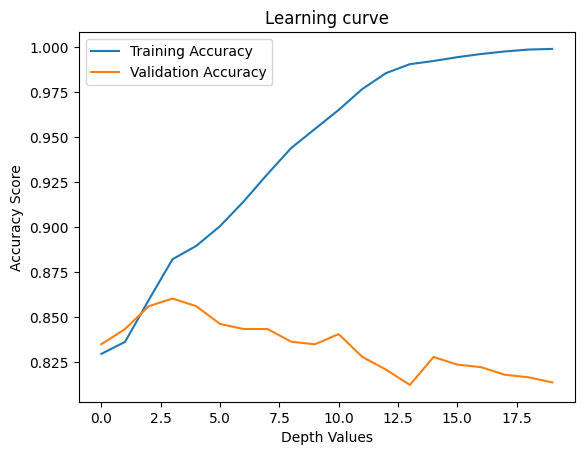

In [75]:
# Plotting learning curve
plt.plot(training_acc, label = 'Training Accuracy')
plt.plot(validation_acc, label = 'Validation Accuracy')
plt.xlabel('Depth Values')
plt.ylabel('Accuracy Score')
plt.title('Learning curve')
plt.legend();

From the training curve we can estimate that the best depth value that yielded the highest accuracy score was between 2 and 5. However, a better way to pick out the depth value would be to get the index value that corresponds to the highest accuracy score in the `validation_acc` list

In [76]:
# Best depth value
best_val_acc = max(validation_acc)
best_depth = validation_acc.index(best_val_acc) +1
print(f'Best depth value with an accuracy of {round(best_val_acc * 100, 2)}% on the validation set is {best_depth}')


Best depth value with an accuracy of 86.02% on the validation set is 4


In [77]:
# Train a Decision tree model with best depth
tree_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
tree_model.fit(X_train, y_train)

# Predict target values for test data
y_pred = tree_model.predict(X_test)

# Evaluate the model's accuracy
tree_acc = round(accuracy_score(y_test, y_pred), 3)
print(f'Accuracy of Decision tree model is {tree_acc * 100}%')


# Add to model list
trained_models.append(tree_model)

Accuracy of Decision tree model is 84.6%


### Support Vector Machines

In [78]:
# Iterating to see which kernel gives the best result
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
score_list = {}
scores = 0
svm_linear = []

for k in tqdm(kernels):
    svm_model = SVC(random_state = 42, kernel= k)
    svm_model.fit(X_train, y_train)
    if k == 'linear':
      svm_linear.append(svm_model)
    f_score = svm_model.score(X_val, y_val)
    score_list.update({k: f_score})


score_list

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.19it/s]


{'linear': 0.8629943502824858,
 'poly': 0.846045197740113,
 'rbf': 0.865819209039548,
 'sigmoid': 0.826271186440678}

In [79]:
max_val = max(score_list.values())
list_values = list(score_list.values())
list_keys = list(score_list.keys())

# Best kernel
k = list_keys[list_values.index(max_val)]

In [80]:
from IPython.display import Markdown
Markdown(f"""
#### From the result we can determine that the optimal kernal for the SVC is {k}""")


#### From the result we can determine that the optimal kernal for the SVC is rbf

In [81]:
# Train a SVC model
svm_model = SVC(random_state = 42, kernel = k)
svm_model.fit(X_train, y_train)

# Predict target values for test data
y_pred = svm_model.predict(X_test)

# Evaluate the model's accuracy
svm_acc = round(accuracy_score(y_test, y_pred),3)
print(f'Accuracy of Support vector classifier model is {svm_acc * 100}%')

# Add to model list
trained_models.append(svm_model)

Accuracy of Support vector classifier model is 84.7%


To train both Random forest and K-nearest neighbours, we will make use of Grid Search to determine the best parameters. We will also stick to the default value for cross validation which is 5 folds.

### Random forest

In [82]:
# Train a Random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict target values for training data
y_pred_train = rf_model.predict(X_train)
rf_acc_train = round(accuracy_score(y_train, y_pred_train), 3)

# Predict target values for validation data
y_pred_val = rf_model.predict(X_val)
rf_acc_val = round(accuracy_score(y_val, y_pred_val), 3)

print('With default parameters: ')
print(f'Accuracy of Random forest model on training data is {rf_acc_train * 100}%')
print(f'Accuracy of Random forest model on validation data is {rf_acc_val * 100}%')


With default parameters: 
Accuracy of Random forest model on training data is 100.0%
Accuracy of Random forest model on validation data is 87.4%


We can perform a grid search to generate best parameters to train a random forest model.

In [83]:
# Using Grid search to determine best parameters
param_grid = {
    'n_estimators': [25, 50, 75, 100],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv = 5)
# Fit Grid
grid_search.fit(X_train, y_train)
best_rf_parameters = grid_search.best_params_
print(f'Grid search parameters: {best_rf_parameters}')



Grid search parameters: {'max_depth': 9, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 75}


In [85]:
# Train a Random forest model with best estimator from Grid search
grid_rf_model = RandomForestClassifier(random_state = 42,
                                       max_depth = best_rf_parameters['max_depth'],
                                      max_leaf_nodes = best_rf_parameters['max_leaf_nodes'],
                                      n_estimators = best_rf_parameters['n_estimators'],
                                       max_features = best_rf_parameters['max_features'])
grid_rf_model.fit(X_train, y_train)

# Predict target values for training data
y_pred_train = grid_rf_model.predict(X_train)
rf_acc_train = round(accuracy_score(y_train, y_pred_train), 3)

# Predict target values for validation data
y_pred_val = grid_rf_model.predict(X_val)
rf_acc_val = round(accuracy_score(y_val, y_pred_val), 3)

print('With Grid search best estimator parameters: ')
print(f'Accuracy of Random forest model on training data is {rf_acc_train * 100}%')
print(f'Accuracy of Random forest model on validation data is {rf_acc_val * 100}%')

With Grid search best estimator parameters: 
Accuracy of Random forest model on training data is 88.4%
Accuracy of Random forest model on validation data is 86.6%


In [86]:
# Predict target values for test data using default parameters
y_pred = grid_rf_model.predict(X_test)
rf_acc = round(accuracy_score(y_test, y_pred), 3)
print(f'Accuracy of Random forest model on test data is {rf_acc * 100}%')

# Add to model list
trained_models.append(grid_rf_model)

Accuracy of Random forest model on test data is 84.89999999999999%


### K- Nearest Neighbours



In [88]:
# Define the best parameter values using grid search
param_grid = {'n_neighbors': np.arange(1, 25)}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Fit grid
grid_knn.fit(X_train, y_train)
best_knn_parameters = grid_knn.best_params_
print(f'Grid search parameters: {best_knn_parameters}')


Grid search parameters: {'n_neighbors': 9}


In [89]:
# Train Knn model with grid parameters
grid_knn_model = KNeighborsClassifier(n_neighbors= best_knn_parameters['n_neighbors'])
grid_knn_model.fit(X_train, y_train)
# Predict target values for training data
y_pred_train = grid_knn_model.predict(X_train)
knn_acc_train = round(accuracy_score(y_train, y_pred_train), 3)

# Predict target values for validation data
y_pred_val = grid_knn_model.predict(X_val)
knn_acc_val = round(accuracy_score(y_val, y_pred_val), 3)

print('With Grid search best estimator parameters: ')
print(f'Accuracy of KNN model on training data is {knn_acc_train * 100}%')
print(f'Accuracy of KNN model on validation data is {knn_acc_val * 100}%')

With Grid search best estimator parameters: 
Accuracy of KNN model on training data is 86.3%
Accuracy of KNN model on validation data is 80.60000000000001%


We will also try the elbow method to compare optimal K value

In [90]:
# Empty list for accuracy scores
train_accuracy = []
val_accuracy = []
for i in tqdm(range(1,21)):
  # Train a Knn model
  knn_model = KNeighborsClassifier(n_neighbors=i)
  # Fit model
  knn_model.fit(X_train, y_train)

  # Prediction for training data
  y_pred_train = knn_model.predict(X_train)
  # Prediction for validation data
  y_pred_val = knn_model.predict(X_val)

  # Accuracy Scores
  train_accuracy.append(accuracy_score(y_train, y_pred_train))
  val_accuracy.append(accuracy_score(y_val, y_pred_val))

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 26.21it/s]


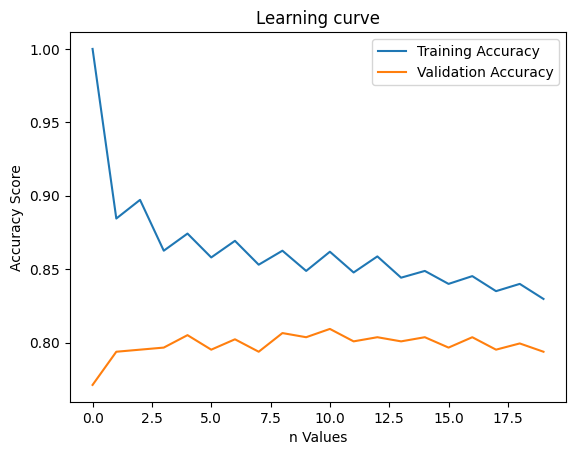

In [91]:
# Plotting learning curve
plt.plot(train_accuracy, label = 'Training Accuracy')
plt.plot(val_accuracy, label = 'Validation Accuracy')
plt.xlabel('n Values')
plt.ylabel('Accuracy Score')
plt.title('Learning curve')
plt.legend();

From the curve, we can estimate that the best k values are between 12 and 17.

In [92]:
# Determine best n value
n = val_accuracy.index(max(val_accuracy)) + 1

In [93]:
print(f'From the result we can determine that the optimal n value with the highest score of {round(max(val_accuracy), 3)  * 100}% is {n}')

From the result we can determine that the optimal n value with the highest score of 80.9% is 11


We will use the best parameters retrieved from grid search.

In [94]:
# Train a KNN model
knn_model = KNeighborsClassifier(n_neighbors=n)
# knn_model = KNeighborsClassifier(n_neighbors=21)
knn_model.fit(X_train, y_train)

# Predict target values for test data
y_pred = knn_model.predict(X_test)

# Evaluate the model's accuracy
knn_acc = round(accuracy_score(y_test, y_pred), 3)
print(f'Accuracy of KNN model is {knn_acc * 100}%')

# Confusion Matrix
knn_matrix = confusion_matrix(y_test, y_pred)

# Add to model list
trained_models.append(knn_model)

Accuracy of KNN model is 78.10000000000001%


## Accuracy for each classification model

For each model we would view which of them performs the best.

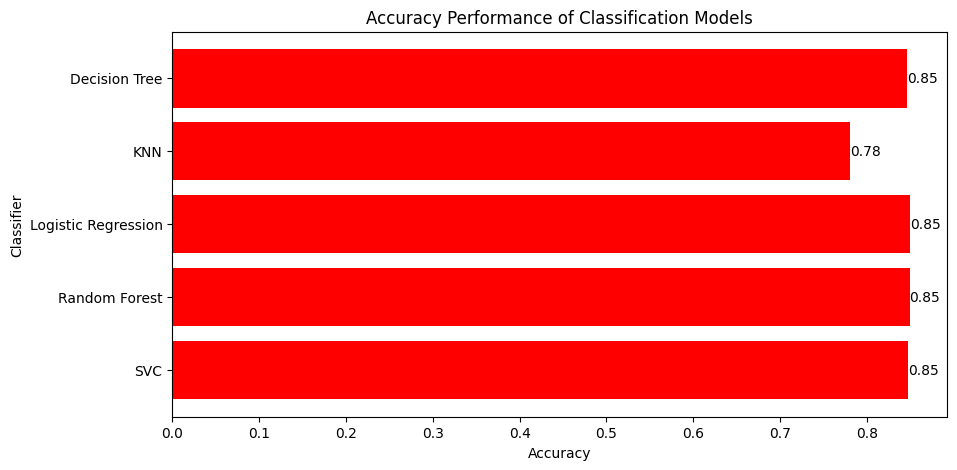

In [97]:
# Assuming accuracy_of_models is already defined as shown
accuracy_of_models = {'SVC': svm_acc,
                      'Random Forest': rf_acc,
                      'Logistic Regression': lr_acc,
                      'KNN': knn_acc,
                      'Decision Tree': tree_acc}

# Create the bar plot
plt.figure(figsize=(10, 5))
bars = plt.barh(list(accuracy_of_models.keys()), list(accuracy_of_models.values()), color='red')

# Add text labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', 
             va='center', ha='left')

# Set titles and labels
plt.title('Accuracy Performance of Classification Models')
plt.xlabel('Accuracy')
plt.ylabel('Classifier')

# Save the figure
plt.savefig('accuracy_performance.svg', format='svg')

# Show the plot
plt.show()